In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing necessary libraries and datasets

In [128]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

In [129]:
file=pd.read_csv("/content/drive/MyDrive/Datasets/Titanic-Dataset.csv")
file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Renamaing column to better read the dataset

In [130]:
new_column={"Pclass":"Ticket_Class","SibSp":"siblings_per_spouse","Parch":"parents_per_children","Embarker":"Onboarding_station"}
file=file.rename(columns=new_column)
file.head()

,PassengerId,Survived,Ticket_Class,Name,Sex,Age,siblings_per_spouse,parents_per_children,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Dropping the columns which are not required for our analysis process

In [131]:
file=file.drop(columns=["PassengerId","Name"])

#Understading the data as a part of EDA

In [132]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Survived              891 non-null    int64  
 1   Ticket_Class          891 non-null    int64  
 2   Sex                   891 non-null    object 
 3   Age                   714 non-null    float64
 4   siblings_per_spouse   891 non-null    int64  
 5   parents_per_children  891 non-null    int64  
 6   Ticket                891 non-null    object 
 7   Fare                  891 non-null    float64
 8   Cabin                 204 non-null    object 
 9   Embarked              889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [133]:
file.loc[:,["Age","siblings_per_spouse","parents_per_children","Fare"]].describe()

,Age,siblings_per_spouse,parents_per_children,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


#Handling missing values to better carry out our analysis

In [134]:
file.isna().sum()

Survived                  0
Ticket_Class              0
Sex                       0
Age                     177
siblings_per_spouse       0
parents_per_children      0
Ticket                    0
Fare                      0
Cabin                   687
Embarked                  2
dtype: int64

**There are multiple null values which can be either dropped or filled through various methods like random values etc.**

**Cabin field has the most null values and it should be dropped off as we cannot fill cabin as a random value**

**But we can fill the null age as average age of the population**

In [135]:
file["Age"].fillna(np.mean(file["Age"]),inplace=True)

In [136]:
file.dropna(inplace=True)

In [137]:
file.isna().sum()

Survived                0
Ticket_Class            0
Sex                     0
Age                     0
siblings_per_spouse     0
parents_per_children    0
Ticket                  0
Fare                    0
Cabin                   0
Embarked                0
dtype: int64

In [138]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 889
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Survived              202 non-null    int64  
 1   Ticket_Class          202 non-null    int64  
 2   Sex                   202 non-null    object 
 3   Age                   202 non-null    float64
 4   siblings_per_spouse   202 non-null    int64  
 5   parents_per_children  202 non-null    int64  
 6   Ticket                202 non-null    object 
 7   Fare                  202 non-null    float64
 8   Cabin                 202 non-null    object 
 9   Embarked              202 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 17.4+ KB


**We can see that the null values in age is filled with an average value but the null values from cabin field are dropped**

#Handling some irregularities in the dataset

In [139]:
file.dtypes

Survived                  int64
Ticket_Class              int64
Sex                      object
Age                     float64
siblings_per_spouse       int64
parents_per_children      int64
Ticket                   object
Fare                    float64
Cabin                    object
Embarked                 object
dtype: object

In [140]:
file["Ticket"].head()

1     PC 17599
3       113803
6        17463
10     PP 9549
11      113783
Name: Ticket, dtype: object

**The above irregularities in the ticket field should be carefully handled (alphanumeric) making it consistent and of similar datatype**

In [141]:
file['Ticket'] = file['Ticket'].apply(lambda x: re.sub(r'[^0-9\-]', '', x))

In [142]:
file["Ticket"]=file["Ticket"].astype("int")

In [143]:
file.dtypes

Survived                  int64
Ticket_Class              int64
Sex                      object
Age                     float64
siblings_per_spouse       int64
parents_per_children      int64
Ticket                    int64
Fare                    float64
Cabin                    object
Embarked                 object
dtype: object

In [144]:
file=file.drop(columns=["Ticket"])

##Handling outliers in some numerical column which can make out model biased

<Axes: ylabel='Fare'>

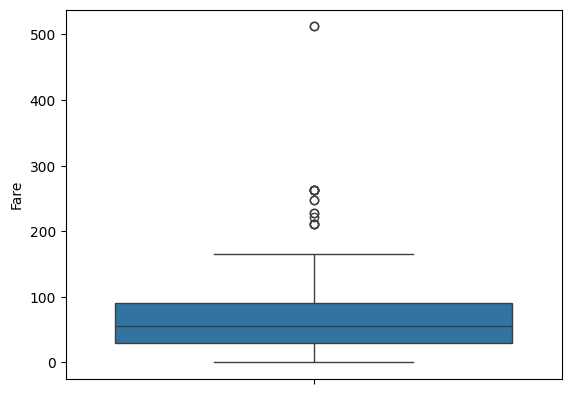

In [145]:
sns.boxplot(file["Fare"])

In [146]:
q1=file["Fare"].quantile(0.25)
q3=file["Fare"].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
file=file[(file["Fare"]<ub)&(file["Fare"]>lb)]

<Axes: ylabel='Fare'>

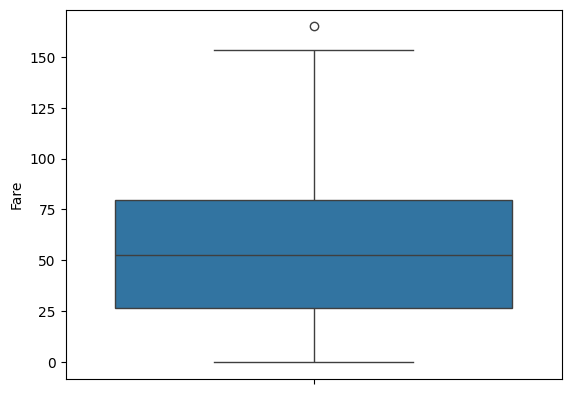

In [147]:
sns.boxplot(file["Fare"])

#Data Visualisation for better understanding the data

In [148]:
file.head()

,Survived,Ticket_Class,Sex,Age,siblings_per_spouse,parents_per_children,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
10,1,3,female,4.0,1,1,16.7000,G6,S
11,1,1,female,58.0,0,0,26.5500,C103,S


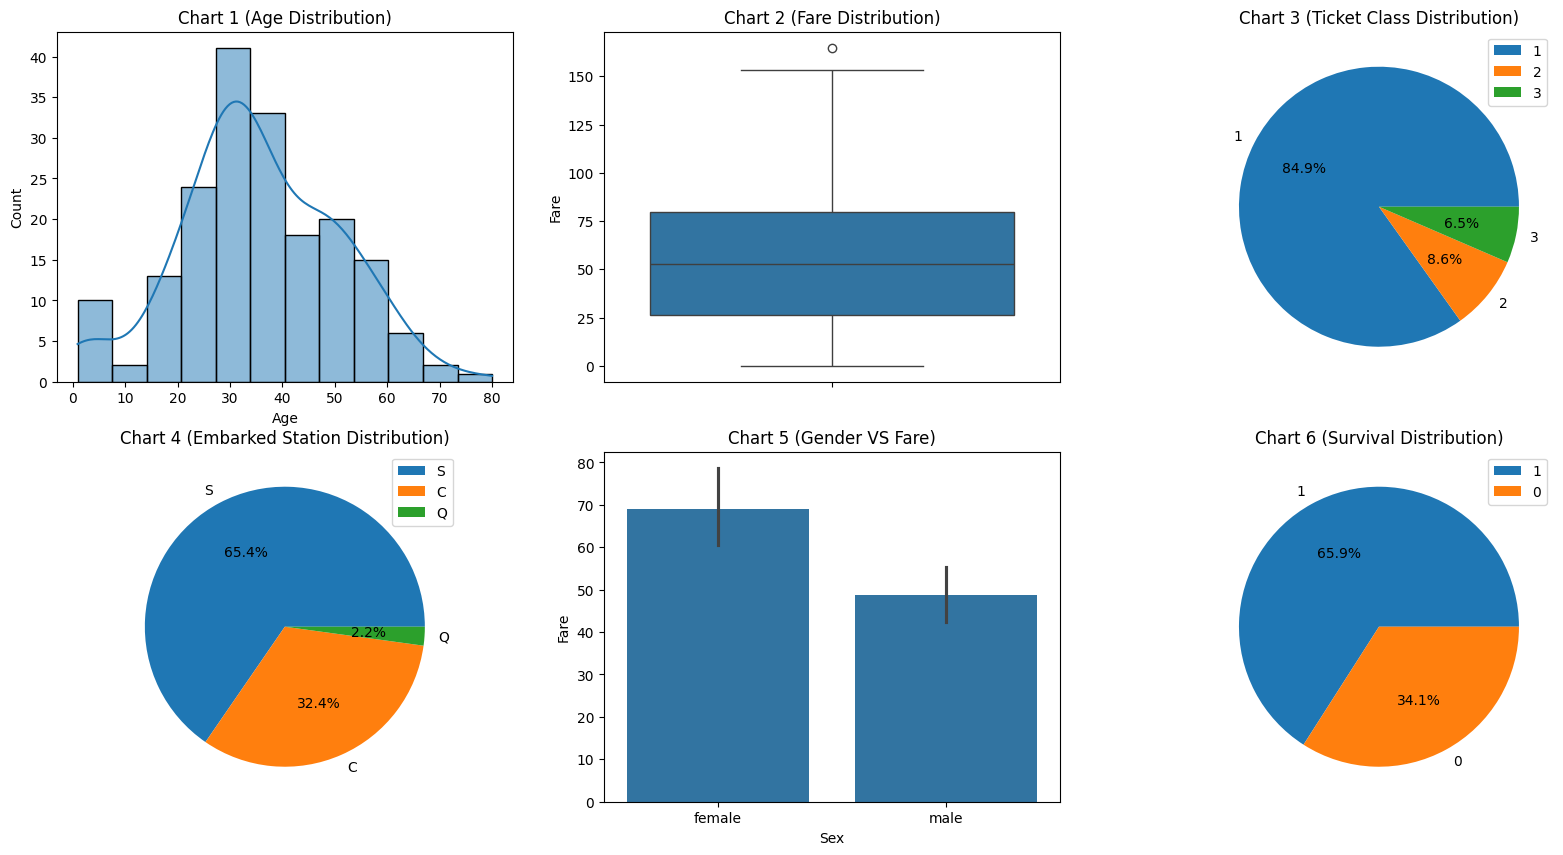

In [171]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
sns.histplot(file["Age"],kde=True,ax=axes[0,0])
sns.boxplot(file['Fare'],ax=axes[0,1])
axes[0,2].pie(file["Ticket_Class"].value_counts(),labels=file["Ticket_Class"].value_counts().index,autopct='%1.1f%%')
axes[0,2].legend(file["Ticket_Class"].value_counts().index)
axes[1,0].pie(file["Embarked"].value_counts(),labels=file["Embarked"].value_counts().index,autopct='%1.1f%%')
axes[1,0].legend(file["Embarked"].value_counts().index)
sns.barplot(x=file["Sex"],y=file["Fare"],ax=axes[1,1],estimator=np.mean)
axes[0,0].set_title("Chart 1 (Age Distribution)")
axes[0,1].set_title("Chart 2 (Fare Distribution)")
axes[0,2].set_title("Chart 3 (Ticket Class Distribution)")
axes[1,0].set_title("Chart 4 (Embarked Station Distribution)")
axes[1,1].set_title("Chart 5 (Gender VS Fare)")
axes[1,2].set_title("Chart 6 (Survival Distribution)")
axes[1,2].pie(file["Survived"].value_counts(),labels=file["Survived"].value_counts().index,autopct='%1.1f%%')
axes[1,2].legend(file["Survived"].value_counts().index)




<Axes: title={'center': 'Chart 3 (Embarked Station VS Fare)'}, xlabel='Embarked', ylabel='Fare'>

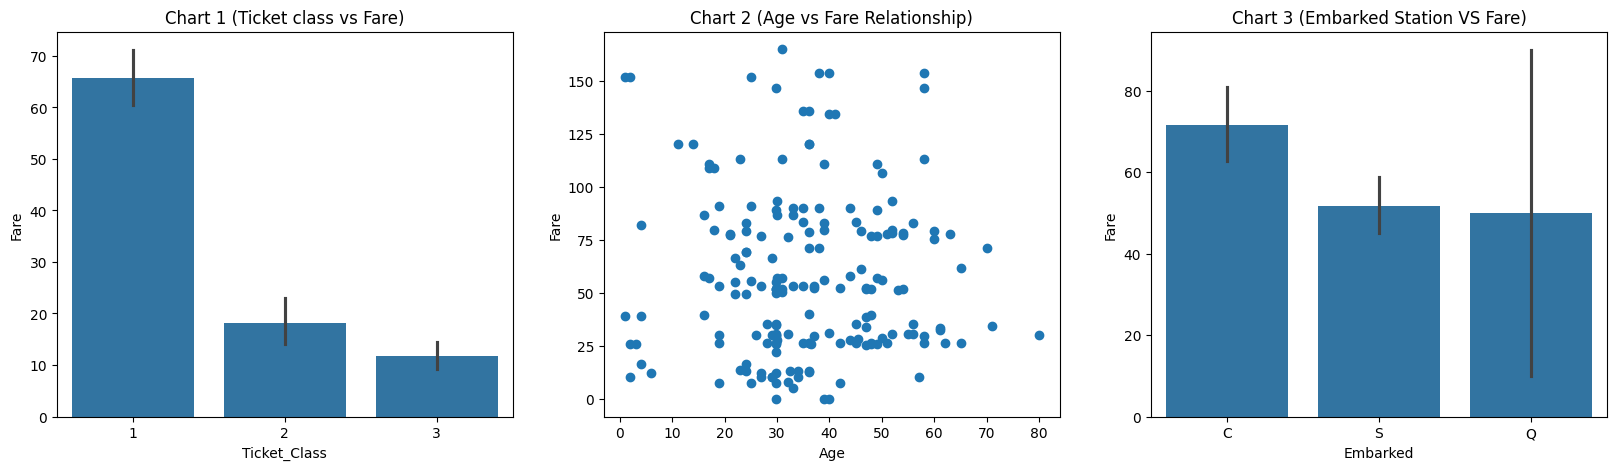

In [176]:
fig,axes=plt.subplots(1,3,figsize=(20,5))
axes[0].set_title("Chart 1 (Ticket class vs Fare)")
axes[1].set_title("Chart 2 (Age vs Fare Relationship)")
axes[2].set_title("Chart 3 (Embarked Station VS Fare)")
sns.barplot(x=file["Ticket_Class"],y=file["Fare"],ax=axes[0],estimator=np.mean)
axes[1].scatter(file["Age"],file["Fare"])
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Fare")
sns.barplot(x=file["Embarked"],y=file["Fare"],ax=axes[2])


#Label encoding for all the ordinal data

In [68]:
label_encoder={}
for column in file.columns:
  if file[column].dtype=="object":
    label_encoder[column]=LabelEncoder()
    file[column]=label_encoder[column].fit_transform(file[column])

In [127]:
file.head()

,Survived,Ticket_Class,Sex,Age,siblings_per_spouse,parents_per_children,Fare,Cabin,Embarked
1,1,1,0,38.0,1,0,71.2833,80,0
3,1,1,0,35.0,1,0,53.1000,54,2
6,0,1,1,54.0,0,0,51.8625,128,2
10,1,3,0,4.0,1,1,16.7000,144,2
11,1,1,0,58.0,0,0,26.5500,48,2


#Modelling begins

##Training the model with train data

###Fixing the features and the target variables with the required fields

In [75]:
features=file.drop(columns=["Survived"])
target=file["Survived"]

In [76]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

## **Model 1:** Naive Bayes Classification

In [98]:
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


0.7027027027027027
              precision    recall  f1-score   support

           0       0.55      0.85      0.67        13
           1       0.88      0.62      0.73        24

    accuracy                           0.70        37
   macro avg       0.72      0.74      0.70        37
weighted avg       0.77      0.70      0.71        37



Text(50.722222222222214, 0.5, 'Ground Truth')

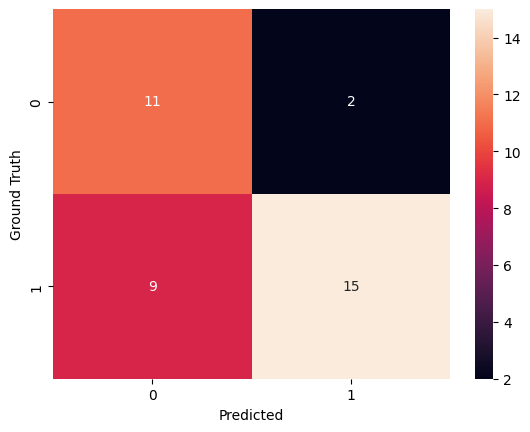

In [100]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")

###**Testing** : Test with some random data

In [101]:
test_data=np.array([[1,	0	,38.0,	1,	0	,71.2833	,80,	0],[1,	1	,54.0,	0,	0	,51.8625,	128	,2]])
print(model.predict(test_data))

[1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


## **Model 2:** KNN Classification

In [102]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


0.5675675675675675
              precision    recall  f1-score   support

           0       0.20      1.00      0.33         4
           1       1.00      0.52      0.68        33

    accuracy                           0.57        37
   macro avg       0.60      0.76      0.51        37
weighted avg       0.91      0.57      0.64        37



Text(50.722222222222214, 0.5, 'Ground Truth')

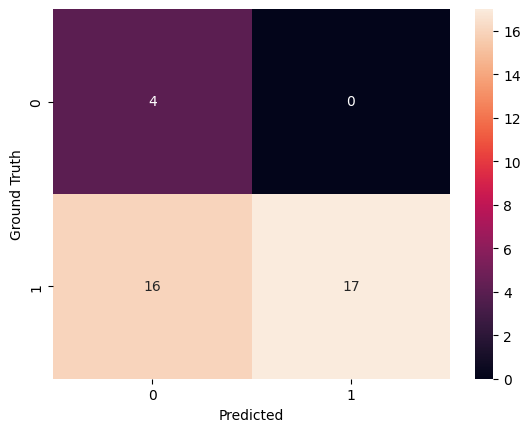

In [104]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")

In [105]:
test_data=np.array([[1,	0	,38.0,	1,	0	,71.2833	,80,	0],[1,	1	,54.0,	0,	0	,51.8625,	128	,2]])
print(model.predict(test_data))

[1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
